#  Анализ данных об оптовых продажах аудиотехники

Компания продает аудиотехнику оптом. Необходимо оценить продажи за месяц и подготовить рекомендации для руководства.  
Проведем комплексный анализ деятельности компании за отчетный месяц. Основная цель - оценить текущее состояние продаж и определить направления для улучшения бизнес-показателей.

- Изучим динамику продаж за месяц, чтобы определить проблемные зоны и точки роста
- Проанализируем и визуализируем ключевые показатели деятельности компании
- Сформулируем предложения по оптимизации ассортимента
- Подготовим оценку эффективности работы менеджеров отдела продаж

### 1. Соберем датасеты с заказами

1. Датафрейм на основе датасетов `orders.csv` + добавим колонку `manager` с именами менеджеров и колонку `date` с датами. 
2. Датафрейм на основе датасетов `order_status.csv`.  
3. Датафрейм на основе датасетов `products.csv` + добавим колонку `category` с категориями товаров.  

In [1]:
import pandas as pd
import os

In [2]:
way = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-irina-trifonova-jc-f180c/python_project_music/data/'

In [3]:
target_files = ['orders.csv', 'order_status.csv', 'products.csv']

In [4]:
data_files = []
for path, dirs, files in os.walk(way):
    for file in files:
        if file in target_files:
            full_path = os.path.join(path, file)
            data_files.append(full_path)

In [5]:
for i in data_files:
    if 'products.csv' in i:
        print(i)

/mnt/HC_Volume_18315164/home-jupyter/jupyter-irina-trifonova-jc-f180c/python_project_music/data/products/Ламповый усилитель/products.csv
/mnt/HC_Volume_18315164/home-jupyter/jupyter-irina-trifonova-jc-f180c/python_project_music/data/products/Настенная акустика/products.csv
/mnt/HC_Volume_18315164/home-jupyter/jupyter-irina-trifonova-jc-f180c/python_project_music/data/products/Центральный канал/products.csv
/mnt/HC_Volume_18315164/home-jupyter/jupyter-irina-trifonova-jc-f180c/python_project_music/data/products/Предусилитель/products.csv
/mnt/HC_Volume_18315164/home-jupyter/jupyter-irina-trifonova-jc-f180c/python_project_music/data/products/Напольная акустика/products.csv
/mnt/HC_Volume_18315164/home-jupyter/jupyter-irina-trifonova-jc-f180c/python_project_music/data/products/Саундбар/products.csv
/mnt/HC_Volume_18315164/home-jupyter/jupyter-irina-trifonova-jc-f180c/python_project_music/data/products/AV-процессор/products.csv
/mnt/HC_Volume_18315164/home-jupyter/jupyter-irina-trifonova-jc

In [6]:
orders_df_list = []

In [7]:
order_status_df_list = []

In [8]:
products_df_list = []

In [9]:
for i in data_files:
    df = pd.read_csv(i)
    if 'orders.csv' in i:
        parts = i.split(os.sep) # разбиваю путь на части, чтобы взять имя и дату
        manager = parts[-2]
        date = parts[-3]
        df['manager'] = manager
        df['date'] = date
        orders_df_list.append(df)
    elif 'order_status.csv' in i:
        order_status_df_list.append(df)
    elif 'products.csv' in i:
        parts = i.split(os.sep)
        category = parts[-2]
        df['category'] = category
        products_df_list.append(df)

In [10]:
df_orders = pd.concat(orders_df_list, ignore_index = True)

In [11]:
df_order_status = pd.concat(order_status_df_list, ignore_index = True)

In [12]:
df_products = pd.concat(products_df_list, ignore_index = True)

In [13]:
df_orders.shape

(4603, 5)

In [14]:
df_order_status.shape

(346, 3)

In [15]:
df_products.shape

(1677, 4)

### 2. Проанализируем изменения в количестве заказов во времени и выявим аномальные дни, не соответствующие общей тенденции

Посчитаем количество заказов по дням

In [16]:
df_orders.head()

,order_id,product_id,quantity,manager,date
0,DBND-68924378,282,24,Виктор Тромбонов,2024-03-29
1,DBND-68924378,639,16,Виктор Тромбонов,2024-03-29
2,DBND-68924378,1193,22,Виктор Тромбонов,2024-03-29
3,DBND-68924378,777,12,Виктор Тромбонов,2024-03-29
4,DBND-68924378,24,30,Виктор Тромбонов,2024-03-29


In [17]:
df_orders['date'] = pd.to_datetime(df_orders['date'])

In [18]:
df_orders.dtypes

order_id              object
product_id             int64
quantity               int64
manager               object
date          datetime64[ns]
dtype: object

In [19]:
orders_by_date = df_orders.groupby('date', as_index=False) \
    .order_id.nunique() \
    .rename(columns={'order_id': 'orders'}) \
    .sort_values('orders', ascending=False)

In [20]:
orders_by_date

,date,orders
13,2024-03-14,34
12,2024-03-13,24
0,2024-03-01,22
28,2024-03-29,19
4,2024-03-05,18
26,2024-03-27,18
25,2024-03-26,17
14,2024-03-15,17
21,2024-03-22,16
18,2024-03-19,15


Построим график заказов по дням, чтобы определить, есть ли сезонность  

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
sns.set(style='whitegrid',
    palette='pastel',
    font='sans-serif',
    font_scale=1)

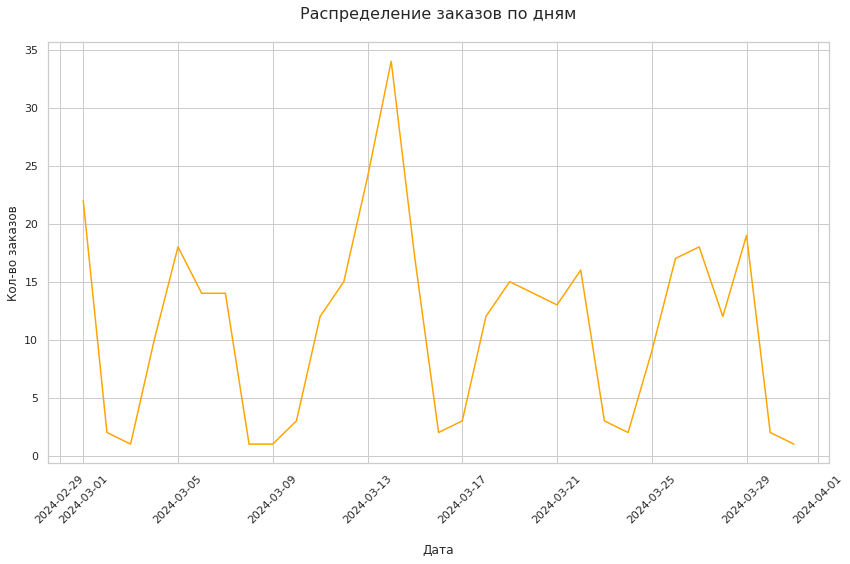

In [23]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=orders_by_date, x='date', y='orders', color='orange')
plt.title('Распределение заказов по дням\n', fontsize=16)
plt.xlabel('\nДата')
plt.ylabel('Кол-во заказов')
plt.xticks(rotation=45)
plt.tight_layout()

Можем заметить, что на выходных происходит спад, заказов почти нет. Также из общей картины выбивается пятница 2024-03-08, в которую было мало заказов. Очевидно, что 8 марта - праздничный день, который соответствует тенденции выходного дня

Пиковое значение активности зафиксировано 14 марта, когда наблюдался резкий скачок количества заказов

### 3. Попробуем выяснить причины скачка заказов 14-го марта

Добавим к данным о заказах информацию об их статусах, чтобы подробнее изучить этот день

In [24]:
orders_status = df_orders.merge(df_order_status, on='order_id')



In [25]:
orders_status.shape

(4603, 7)

In [26]:
orders_status.head()

,order_id,product_id,quantity,manager,date,client_id,status
0,DBND-68924378,282,24,Виктор Тромбонов,2024-03-29,10,confirmed
1,DBND-68924378,639,16,Виктор Тромбонов,2024-03-29,10,confirmed
2,DBND-68924378,1193,22,Виктор Тромбонов,2024-03-29,10,confirmed
3,DBND-68924378,777,12,Виктор Тромбонов,2024-03-29,10,confirmed
4,DBND-68924378,24,30,Виктор Тромбонов,2024-03-29,10,confirmed


Посмотрим на количество и соотношение подтвержденных и отмененных заказов

In [27]:
status_outdupl = orders_status[['order_id', 'status']].drop_duplicates()



In [28]:
status_outdupl['status'].value_counts()

confirmed    309
canceled      37
Name: status, dtype: int64

In [29]:
status_outdupl['status'].value_counts(normalize=True).round(2) #соотношение подтвержденных и отмененных заказов

confirmed    0.89
canceled     0.11
Name: status, dtype: float64

Посчитаем количество подтвержденных и отмененных заказов на каждую дату

In [30]:
status_by_date_1 = orders_status.groupby(['date', 'status'], as_index=False) \
    .order_id.nunique() \
    .rename(columns={'order_id': 'orders'})

status_by_date_2 = status_by_date_1.pivot(index='date', columns='status', values='orders') \
    .fillna(0)



In [31]:
status_by_date_2[['canceled', 'confirmed']] = status_by_date_2[['canceled', 'confirmed']].astype(int)

In [32]:
status_by_date_2

status,canceled,confirmed
date,,
2024-03-01,2,20
2024-03-02,0,2
2024-03-03,0,1
2024-03-04,0,10
2024-03-05,0,18
2024-03-06,1,13
2024-03-07,1,13
2024-03-08,0,1
2024-03-09,1,0


Построим график с заказами по дням в разбивке по статусу заказа. Подробнее проанализируем на день с наибольшим числом заказов

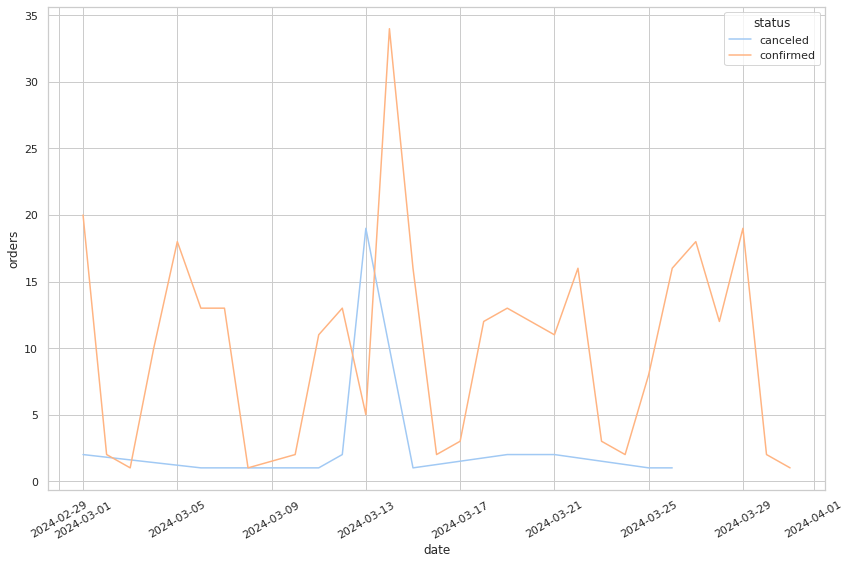

In [33]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=status_by_date_1, x='date', y='orders', hue='status', )

plt.xticks(rotation=30)
plt.tight_layout()

В самый активный день все заказы были успешно оформлены, а вот днем ранее было много отмен

**Гипотеза:** возможно, 13 марта техническая неполадка в системе CRM привела к тому, что клиенты не смогли подтвердить свои заказы. Все заказы первого дня были автоматически аннулированы, и покупателям пришлось оформлять их заново на следующий день.

Проверим, повторяются ли заказы от 13 и 14 марта

In [34]:
canceled_orders_13 = orders_status.query('date == "2024-03-13" and status == "canceled"') \
    .groupby('order_id', as_index=False) \
    .agg({'product_id': 'nunique',
        'quantity': 'sum',
        'manager': 'max',
        'client_id': 'max'}) \
    .rename(columns = {'product_id': 'unique_products'})



In [35]:
canceled_orders_13.head(2)

,order_id,unique_products,quantity,manager,client_id
0,AFIH-00611801,11,192,Алексей Саксофонов,43
1,BBFJ-27674101,14,294,Ксения Балалайкина,73


In [36]:
confirmed_orders_14 = orders_status.query('date == "2024-03-14" and status == "confirmed"') \
    .groupby('order_id', as_index=False) \
    .agg({'product_id': 'nunique',
        'quantity': 'sum',
        'manager': 'max',
        'client_id': 'max'}) \
    .rename(columns = {'product_id': 'unique_products'})

In [37]:
confirmed_orders_14.shape

(34, 5)

In [38]:
orders_canceled_confirmed = canceled_orders_13.merge(confirmed_orders_14, on=['manager', 'client_id', 'unique_products', 'quantity'])

In [39]:
orders_canceled_confirmed.shape

(16, 6)

In [40]:
round(16/34, 2)

0.47

Почти половина заказов 14 марта почти полностью повторяют заказы от 13 марта  
У заказов совпадают несколько параметров: клиент, менеджер, количество уникальных товаров в заказе и общее число товаров в штуках, отличается только номер заказа  
  
Проблема была действительно на стороне CRM

### 4. Посчитаем ключевые метрики, посмотрим на их динамику и составим небольшой отчет

В наших данных цена товара указана в долларах США (так как закупка происходит в этой валюте), а продаются товары за российские рубли, так что метрики считать будем в рублях  

Чтобы рассчитать цену в рублях, импортируем файл с курсом доллара США на каждую дату месяца  

In [41]:
p = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-irina-trifonova-jc-f180c/python_project_music/usd_rate.txt'



In [42]:
currency = open(p).readlines()

In [43]:
df_currency = pd.DataFrame(currency, columns=['dollar'])

In [44]:
split_data = df_currency['dollar'].str.strip().str.split(',', expand=True)

In [45]:
df_currency['date'] = split_data[0]
df_currency['currency_rate'] = split_data[1]

In [46]:
df_currency['date'] = pd.to_datetime(df_currency['date'])

In [47]:
df_currency = df_currency.drop(columns=['dollar'])

In [48]:
df_currency['currency_rate'] = df_currency['currency_rate'].astype(float)

In [49]:
df_currency

,date,currency_rate
0,2024-03-01,90.8423
1,2024-03-02,91.3336
2,2024-03-03,91.3336
3,2024-03-04,91.3336
4,2024-03-05,91.3534
5,2024-03-06,91.1604
6,2024-03-07,90.3412
7,2024-03-08,90.7493
8,2024-03-09,90.7493
9,2024-03-10,90.7493


#### Рассчитаем общую выручку в рублях, учитывая только подтвержденные заказы

In [50]:
df_full = orders_status.merge(df_products, left_on='product_id', right_on='id')



In [51]:
df_full = df_full.merge(df_currency, on='date')

In [52]:
df_full.head(2)

,order_id,product_id,quantity,manager,date,client_id,status,id,name,price,category,currency_rate
0,DBND-68924378,282,24,Виктор Тромбонов,2024-03-29,10,confirmed,282,"Edifier, X5",43.78,Беспроводные наушники,92.2628
1,DBND-68924378,639,16,Виктор Тромбонов,2024-03-29,10,confirmed,639,"JBL, Studio 550P",515.23,Сабвуфер,92.2628


In [53]:
df_full['price_rub'] = df_full['price'] * df_full['currency_rate']

In [54]:
df_full.head(2)

,order_id,product_id,quantity,manager,date,client_id,status,id,name,price,category,currency_rate,price_rub
0,DBND-68924378,282,24,Виктор Тромбонов,2024-03-29,10,confirmed,282,"Edifier, X5",43.78,Беспроводные наушники,92.2628,4039.265384
1,DBND-68924378,639,16,Виктор Тромбонов,2024-03-29,10,confirmed,639,"JBL, Studio 550P",515.23,Сабвуфер,92.2628,47536.562444


In [55]:
df_full['revenue'] = df_full['price_rub'] * df_full['quantity']

In [56]:
df_confirmed = df_full.query('status == "confirmed"')

In [57]:
df_confirmed.head(2)

,order_id,product_id,quantity,manager,date,client_id,status,id,name,price,category,currency_rate,price_rub,revenue
0,DBND-68924378,282,24,Виктор Тромбонов,2024-03-29,10,confirmed,282,"Edifier, X5",43.78,Беспроводные наушники,92.2628,4039.265384,96942.369216
1,DBND-68924378,639,16,Виктор Тромбонов,2024-03-29,10,confirmed,639,"JBL, Studio 550P",515.23,Сабвуфер,92.2628,47536.562444,760584.999104


In [58]:
rev = df_confirmed.revenue.sum()
print(f"Общая выручка: {rev:,.2f}".replace(',', ' ') + ' руб.')

Общая выручка: 2 038 231 821.56 руб.


#### Далее посчитаем средний чек в этом месяце

In [59]:
df_confirmed.order_id.nunique()



309

In [60]:
aov = 2038231821.564864 / 309
print(f"Средний чек за март: {aov:,.2f}".replace(',', ' ') + ' руб.')

Средний чек за март: 6 596 219.49 руб.


#### Теперь посмотрим на динамику метрик внутри месяца

In [61]:
df_confirmed.head(4)

,order_id,product_id,quantity,manager,date,client_id,status,id,name,price,category,currency_rate,price_rub,revenue
0,DBND-68924378,282,24,Виктор Тромбонов,2024-03-29,10,confirmed,282,"Edifier, X5",43.78,Беспроводные наушники,92.2628,4039.265384,96942.369216
1,DBND-68924378,639,16,Виктор Тромбонов,2024-03-29,10,confirmed,639,"JBL, Studio 550P",515.23,Сабвуфер,92.2628,47536.562444,760584.999104
2,DBND-68924378,1193,22,Виктор Тромбонов,2024-03-29,10,confirmed,1193,"PreSonus, Eris E44",430.59,Активные колонки,92.2628,39727.439052,874003.659144
3,DBND-68924378,777,12,Виктор Тромбонов,2024-03-29,10,confirmed,777,"Klipsch, R-41SA",218.19,Настенная акустика,92.2628,20130.820332,241569.843984


In [62]:
df_report_by_date = df_confirmed.groupby('date', as_index=False) \
    .agg({'order_id': 'nunique',
         'revenue': 'sum'}) \
    .rename(columns={'order_id': 'orders'})



In [63]:
df_report_by_date['AOV'] = (df_report_by_date['revenue'] / df_report_by_date['orders']).round(2)

In [64]:
df_report_by_date.head(2)

,date,orders,revenue,AOV
0,2024-03-01,20,1.554118e+08,7770587.80
1,2024-03-02,2,1.197167e+07,5985834.26


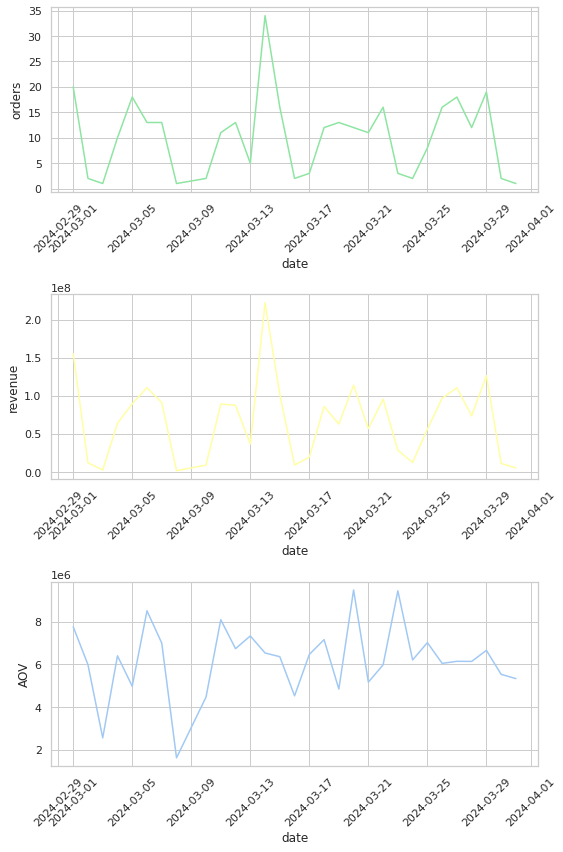

In [65]:
fig, axes = plt.subplots(3, 1, figsize=(8, 12))
sns.lineplot(data=df_report_by_date, x='date', y='orders', ax=axes[0], color='g')
sns.lineplot(data=df_report_by_date, x='date', y='revenue', ax=axes[1], color='y')
sns.lineplot(data=df_report_by_date, x='date', y='AOV', ax=axes[2])
for ax in axes:
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()

- Количество заказов и общая выручка не всегда движутся в одном направлении. Бывает так, что при росте числа заказов выручка падает, а когда заказов становится меньше - выручка, наоборот, растет
- Схожая ситуация наблюдается со средним чеком: его рост не всегда приводит к увеличению выручки, и наоборот - падение среднего чека может сопровождаться ростом общей выручки
- Динамика выручки нестабильна: она постоянно колеблется, то увеличиваясь, то уменьшаясь в течение времени
- Средний чек также демонстрирует нестабильное поведение: на протяжении месяца он то растёт, то падает, не показывая устойчивой тенденции

### 5. Проанализируем интерес клиентов к брендам

Посмотрим, какие бренды востребованы среди клиентов, а какие - нет   
Добавим новую колонку `brand`, где будет только название бренда

In [66]:
df_full.head(2)

,order_id,product_id,quantity,manager,date,client_id,status,id,name,price,category,currency_rate,price_rub,revenue
0,DBND-68924378,282,24,Виктор Тромбонов,2024-03-29,10,confirmed,282,"Edifier, X5",43.78,Беспроводные наушники,92.2628,4039.265384,96942.369216
1,DBND-68924378,639,16,Виктор Тромбонов,2024-03-29,10,confirmed,639,"JBL, Studio 550P",515.23,Сабвуфер,92.2628,47536.562444,760584.999104


In [67]:
full_name = df_full.name.str.strip().str.split(',', expand=True)

In [68]:
df_full['brand'] = full_name[0]

In [69]:
df_full.head(2)

,order_id,product_id,quantity,manager,date,client_id,status,id,name,price,category,currency_rate,price_rub,revenue,brand
0,DBND-68924378,282,24,Виктор Тромбонов,2024-03-29,10,confirmed,282,"Edifier, X5",43.78,Беспроводные наушники,92.2628,4039.265384,96942.369216,Edifier
1,DBND-68924378,639,16,Виктор Тромбонов,2024-03-29,10,confirmed,639,"JBL, Studio 550P",515.23,Сабвуфер,92.2628,47536.562444,760584.999104,JBL


In [70]:
df_full.brand.nunique() #количество уникальных брендов

121

#### Посчитаем выручку с каждого бренда и кол-во подтвержденных заказов с товарами этого бренда

In [71]:
df_full.query('status == "confirmed"') \
    .groupby('brand', as_index=False) \
    .agg({'revenue': 'sum',
         'order_id': 'nunique'}) \
    .sort_values('revenue', ascending=False)



,brand,revenue,order_id
46,JBL,2.665961e+08,264
43,Heco,2.388163e+08,229
53,Klipsch,2.039024e+08,205
120,Yamaha,1.658651e+08,218
49,KEF,1.465101e+08,73
...,...,...,...
8,AudioSource,3.388167e+04,1
40,Fosi Audio,3.129419e+04,1
1,ART,2.670040e+04,2
18,Bravo Audio,2.405086e+04,1


In [72]:
df_full.query('status == "confirmed"') \
    .groupby('brand', as_index=False) \
    .agg({'revenue': 'sum',
         'order_id': 'nunique'}) \
    .sort_values('order_id', ascending=False)

,brand,revenue,order_id
46,JBL,2.665961e+08,264
43,Heco,2.388163e+08,229
120,Yamaha,1.658651e+08,218
53,Klipsch,2.039024e+08,205
62,Magnat,1.141989e+08,154
...,...,...,...
52,Karaoke USA,1.639025e+05,1
24,Creative,1.001419e+04,1
97,Sonance,7.991302e+05,1
107,Technics,2.648291e+05,1


И по кол-ву заказов и по сумме выручке мы видим, что наибольший интерес у клиентов вызывает бренд JBL. Бренды, которыми стабильно часто интересуются клиенты и которые приносят наибольшую выручку: JBL, Heco, Yamaha, Klipsch

#### Теперь посмотрим на эффективность присутствия брендов в нашем каталоге.

- Выявим бренды, у которых большое количество представленных товаров, при этом большинство этих товаров практически не заказывается клиентами.

Определим бренды, чьи товары занимают много места в каталоге, но приносят мало продаж.  

Это поможет:

- оптимизировать ассортимент
- освободить место для более востребованных товаров
- повысить эффективность использования "торгового пространства"

Для начала определим, какие товары хоть раз заказывали, а какие - нет

In [73]:
df_confirmed.head(2)

,order_id,product_id,quantity,manager,date,client_id,status,id,name,price,category,currency_rate,price_rub,revenue
0,DBND-68924378,282,24,Виктор Тромбонов,2024-03-29,10,confirmed,282,"Edifier, X5",43.78,Беспроводные наушники,92.2628,4039.265384,96942.369216
1,DBND-68924378,639,16,Виктор Тромбонов,2024-03-29,10,confirmed,639,"JBL, Studio 550P",515.23,Сабвуфер,92.2628,47536.562444,760584.999104


In [74]:
products_in_orders = df_confirmed.product_id.unique()

In [75]:
df_products['is_in_orders'] = df_products['id'].isin(products_in_orders).map({True: 'yes', False: 'no'})

In [76]:
df_products.head(2)

,id,name,price,category,is_in_orders
0,107,"BoyuuRange, MT-34 MKII",203.22,Ламповый усилитель,yes
1,108,"Bravo Audio, V2",86.60,Ламповый усилитель,yes


In [77]:
df_products.groupby('is_in_orders', as_index=False) \
    .size()

,is_in_orders,size
0,no,497
1,yes,1180


Примерно треть всех товаров за текущий месяц не имела ни одной продажи  
Проведем анализ этих товаров в разрезе брендов

In [78]:
full_brands_2 = df_products.name.str.strip().str.split(',', expand=True)



In [79]:
df_products['brand'] = full_brands_2[0]

In [80]:
df_products.head(2)

,id,name,price,category,is_in_orders,brand
0,107,"BoyuuRange, MT-34 MKII",203.22,Ламповый усилитель,yes,BoyuuRange
1,108,"Bravo Audio, V2",86.60,Ламповый усилитель,yes,Bravo Audio


In [81]:
brand_products = df_products.groupby(['brand', 'is_in_orders'], as_index=False) \
    .agg({'id': 'nunique'}) \
    .rename(columns={'id': 'products'})

In [82]:
brand_products.head(2)

,brand,is_in_orders,products
0,AKG,no,6
1,AKG,yes,5


In [83]:
brand_products_pivot = brand_products.pivot(index='brand', columns='is_in_orders', values='products').fillna(0).reset_index()

In [84]:
brand_products_pivot.head(3)

is_in_orders,brand,no,yes
0,AKG,6.0,5.0
1,ART,0.0,1.0
2,ASUS,1.0,2.0


In [85]:
brand_products_pivot['total'] = brand_products_pivot['no'] + brand_products_pivot['yes']

In [86]:
brand_products_pivot.head(3)

is_in_orders,brand,no,yes,total
0,AKG,6.0,5.0,11.0
1,ART,0.0,1.0,1.0
2,ASUS,1.0,2.0,3.0


In [87]:
brand_products_pivot['not_ordered'] = brand_products_pivot['no'] / brand_products_pivot['total']

In [88]:
brand_products_pivot.head(3)

is_in_orders,brand,no,yes,total,not_ordered
0,AKG,6.0,5.0,11.0,0.545455
1,ART,0.0,1.0,1.0,0.000000
2,ASUS,1.0,2.0,3.0,0.333333


In [89]:
brand_products_pivot.query('total > 15 and not_ordered > 0.5')

is_in_orders,brand,no,yes,total,not_ordered
32,Dali,49.0,18.0,67.0,0.731343
60,KEF,54.0,28.0,82.0,0.658537
77,Marantz,19.0,3.0,22.0,0.863636
94,Pioneer,70.0,33.0,103.0,0.679612


Бренды, у которых доля ни разу не заказанных товаров составляет больше половины от всех продаваемых товаров этого бренда: 
- Dali  
- KEF  
- Marantz   
- Pioneer  

Необходимо провести аудит ассортимента этих брендов

### 6. Составим отчет по продажам менеджеров

Теперь посмотрим на эффективность работы менеджеров отдела продаж. Подготовим аналитический отчет, который поможет объективно оценить вклад каждого сотрудника в результаты работы за месяц

In [90]:
df_confirmed.head(3)

,order_id,product_id,quantity,manager,date,client_id,status,id,name,price,category,currency_rate,price_rub,revenue
0,DBND-68924378,282,24,Виктор Тромбонов,2024-03-29,10,confirmed,282,"Edifier, X5",43.78,Беспроводные наушники,92.2628,4039.265384,96942.369216
1,DBND-68924378,639,16,Виктор Тромбонов,2024-03-29,10,confirmed,639,"JBL, Studio 550P",515.23,Сабвуфер,92.2628,47536.562444,760584.999104
2,DBND-68924378,1193,22,Виктор Тромбонов,2024-03-29,10,confirmed,1193,"PreSonus, Eris E44",430.59,Активные колонки,92.2628,39727.439052,874003.659144


In [91]:
managers = df_confirmed.groupby('manager', as_index=False) \
    .agg({'revenue': 'sum',
         'order_id': 'nunique'}) \
    .rename(columns={'order_id': 'orders'}) \
    .sort_values('revenue', ascending=False)

In [92]:
managers.head(3)

,manager,revenue,orders
9,Маргарита Камертонова,3.473886e+08,48
4,Виктор Тромбонов,3.188999e+08,50
8,Максим Барабанов,2.401478e+08,40


In [93]:
managers['revenue_%'] = ((managers['revenue'] / managers.revenue.sum()) * 100).round(2)

In [94]:
managers

,manager,revenue,orders,revenue_%
9,Маргарита Камертонова,3.473886e+08,48,17.04
4,Виктор Тромбонов,3.188999e+08,50,15.65
8,Максим Барабанов,2.401478e+08,40,11.78
5,Владимир Ударников,2.084865e+08,31,10.23
0,Алексей Саксофонов,1.953435e+08,27,9.58
7,Ксения Балалайкина,1.817621e+08,27,8.92
6,Екатерина Тарелкина,1.781576e+08,28,8.74
10,Надежда Гармошкина,1.347836e+08,21,6.61
1,Анастасия Дудкина,1.234504e+08,20,6.06
2,Антон Скрипкин,5.150268e+07,7,2.53


In [95]:
managers['orders_%'] = ((managers['orders'] / managers.orders.sum()) * 100).round(2)

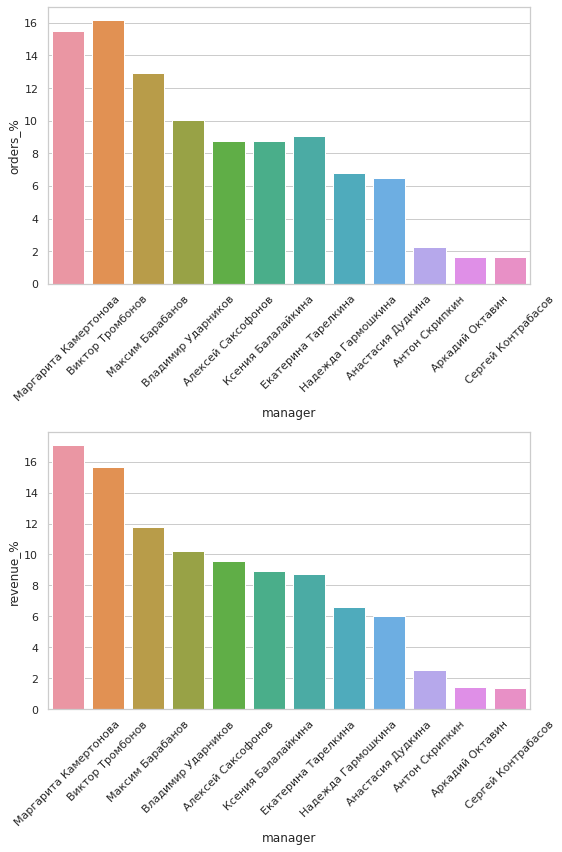

In [96]:
fig, axes = plt.subplots(2, 1, figsize=(8, 12))
sns.barplot(data=managers, x='manager', y='orders_%', ax=axes[0])
sns.barplot(data=managers, x='manager', y='revenue_%', ax=axes[1])
for ax in axes:
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()

- Маргарита Камертонова стала лучшим менеджером по проценту выручки среди всех менеджеров
- Виктор Тромбонов стал лучшим менеджером по количеству заказов с долей около 16% от общего числа сделок
- Сергей Контрабасов продемонстрировал наименьшие показатели эффективности в сравнении с остальными сотрудниками отдела

## Итоги и рекомендации

- Необходимо оптимизировать ассортимент за счет сокращения невостребованных позиций, особенно среди брендов Dali, KEF, Marantz и Pioneer, перераспределив закупки в пользу наиболее востребованных брендов - JBL, Yamaha, Heco и Klipsch. Это позволит повысить оборачиваемость склада и увеличить долю маржинальных товаров.

- Сбой в работе CRM, выявленный 13–14 марта, указывает на необходимость внедрения мониторинга аномалий и резервных сценариев обработки заказов, чтобы минимизировать будущие потери выручки.

- В целях повышения эффективности отдела продаж рекомендуется усилить работу с сотрудниками с низкими показателями, используя обучение и обновлённую систему KPI.